<a href="https://colab.research.google.com/github/kae4ka/neural_networks_course/blob/main/INS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Обучение однослойного персептрона решению линейно разделимых задач. Функции «And» и «Or». Метод простого перебора



* Два входа, один выход
* Обучающая выборка – таблицы истинности
* Функция активация – ступенчатая
* Значения весов перебирать в цикле (например, от -1 до +1 с шагом 0.1)
* Ошибку считать по МНК
* Запоминать все значения весов, при которых ошибка равна 0

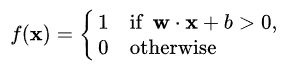

In [ ]:
import numpy as np
import pandas as pd

x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([0, 1, 1, 1])
y_and = np.array([0, 0, 0, 1])
w_or = []
w_and = []
y_pred_or = []
y_pred_and = []

df = pd.DataFrame({'X1': x[:, 0], 'X2': x[:, 1],
                  'OR': y_or, 'AND': y_and},
                  columns=['X1', 'X2', 'OR', 'AND'])
df

,X1,X2,OR,AND
0,0,0,0,0
1,0,1,1,0
2,1,0,1,0
3,1,1,1,1


In [ ]:
def step_func(u):
        return 1 if (u > 0) else 0

In [ ]:
def perceptron(x, y, weights):
  for i in np.arange(-1.0, 1.1, 0.1):
    for j in np.arange(-1.0, 1.1, 0.1):
      for q in np.arange(-1.0, 1.1, 0.1):
        fail = 0
        w = np.array([i, j, q])
        for k, m in np.array(list(zip(x, y))):
            k = np.insert(k, len(k), 1, axis=0)
            y_pred = np.matmul(k, w.T)
            y_pred = step_func(y_pred)
            err = m - y_pred
            if err != 0:
              fail += 1
        if fail == 0:
          weights.append(w)

In [ ]:
perceptron(x, y_or, w_or)
perceptron(x, y_and, w_and)

for k in x:
  k = np.insert(k, len(k), 1, axis=0)
  y_pred = np.dot(k, w_or[0].T)
  y_pred_or.append(step_func(y_pred))
  y_pred = np.dot(k, w_and[0].T)
  y_pred_and.append(step_func(y_pred))

df.insert(3, "OR_pred", y_pred_or, True)
df.insert(5, "AND_pred", y_pred_and, True)

In [ ]:
df

,X1,X2,OR,OR_pred,AND,AND_pred
0,0,0,0,0,0,0
1,0,1,1,1,0,0
2,1,0,1,1,0,0
3,1,1,1,1,1,1


# 2.	Обучение однослойного персептрона  методами направленного обучения (по аналогии с советчиками)

* То же самое, что и ЛР№1, но используется не перебор, а направленное обучение
* Веса корректируются исходя из ошибки
* Обучающая выборка – таблицы истинности
* Функция активация – ступенчатая. Предпочтительней – sign(x)
* Начальное значение весов берем случайно
* Последующее значение – wi+1 = wᵢ + Δw
* Δwᵢ = ɛ * x * d * |wᵢ|
* d = A – Y ошибка (разность между эталонным и расчетным значениями) 

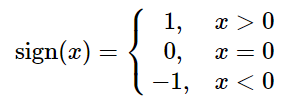

In [ ]:
import numpy as np
import pandas as pd

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_or = np.array([0, 1, 1, 1])
Y_and = np.array([0, 0, 0, 1])
W_or = np.random.rand(3,)
W_and = np.random.rand(3,)

y_pred_or = []
y_pred_and = []

df = pd.DataFrame({'X1': X[:, 0], 'X2': X[:, 1], 'OR': Y_or, 'AND': Y_and},
                  columns = ['X1', 'X2', 'OR', 'AND'])
df

,X1,X2,OR,AND
0,0,0,0,0
1,0,1,1,0
2,1,0,1,0
3,1,1,1,1


In [ ]:
def sign(u):
  return 1 if (u > 0) else 0 

In [ ]:
def perceptron(x_i, w):
  sum = np.matmul(x_i, w.T)
  y_pred = sign(sum)
  return y_pred

In [ ]:
def training(x, y, w, b = 1, lr = 0.1, num_iter = 50):
  for iter_num in range(num_iter):
    for x_i, y_i in np.array(list(zip(x, y))):
      x_i = np.insert(x_i, len(x_i), b, axis = 0)
      y_pred = perceptron(x_i, w)
      err = y_i - y_pred
      w += lr*err*x_i
  return w

In [ ]:
W_or = np.copy(training(X, Y_or, W_or))
W_and = np.copy(training(X, Y_and, W_and))

for k in X:
  k = np.insert(k, len(k), 1, axis = 0)
  y_pred_or.append(perceptron(k, W_or))
  y_pred_and.append(perceptron(k, W_and))

In [ ]:
df.insert(3, "OR_pred", y_pred_or, True)
df.insert(5, "AND_pred", y_pred_and, True)

In [ ]:
df

,X1,X2,OR,OR_pred,AND,AND_pred
0,0,0,0,0,0,0
1,0,1,1,1,0,0
2,1,0,1,1,0,0
3,1,1,1,1,1,1


# 3.	Обучение многослойной нейронной сети решению линейно неразделимых задач. Функция «Exclusive Or»

* То же самое, что и Лаб. 2, но используется многослойный персептрон
* НС: 2 слоя, 2 входа, 1 выход

In [1]:
import numpy as np
import pandas as pd

In [2]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])

Y_xor = np.array([0, 1, 1, 0])
Y_or = np.array([0, 1, 1, 1])
Y_and = np.array([0, 0, 0, 1])

W_or = np.random.rand(3,)
W_and = np.random.rand(3,)
W_not = np.random.rand(2,)

df = pd.DataFrame({'X1': X[:, 0], 'X2': X[:, 1],
                  'OR': Y_or, 'AND': Y_and, 'XOR': Y_xor},
                  columns=['X1', 'X2', 'OR', 'AND', 'XOR'])
df

,X1,X2,OR,AND,XOR
0,0,0,0,0,0
1,0,1,1,0,1
2,1,0,1,0,1
3,1,1,1,1,0


In [3]:
X_not = np.array([[0], [1]])
Y_not = np.array([1, 0])

df_not = pd.DataFrame({'X': X_not[:, 0], 'NOT': Y_not},
                  columns=['X', 'NOT'])
df_not

,X,NOT
0,0,1
1,1,0


In [4]:
def sign(u):
  return 1 if (u > 0) else 0

def perceptron(x_i, w):
  sum = np.dot(x_i, w.T)
  y_pred = sign(sum)
  return y_pred

def training(x, y, w, b = 1, lr = 0.1, num_iter = 50):
    for iter_num in range(num_iter):
      for x_i, y_i in np.array(list(zip(x, y))):
        x_i = np.insert(x_i, len(x_i), b, axis = 0)
        y_pred = perceptron(x_i, w)       
        err = y_i - y_pred
        w += lr*err*x_i
    return w

In [5]:
# обучение логическому ИЛИ
W_or = np.copy(training(X, Y_or, W_or))
# обучение логическому И
W_and = np.copy(training(X, Y_and, W_and))

y_pred_or = []
y_pred_and = []

for k in X:
  k = np.insert(k, len(k), 1, axis=0)
  y_pred_or.append(perceptron(k, W_or))
  y_pred_and.append(perceptron(k, W_and))

df.insert(3, "OR_pred", y_pred_or, True)
df.insert(5, "AND_pred", y_pred_and, True)

df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  # This is added back by InteractiveShellApp.init_path()


,X1,X2,OR,OR_pred,AND,AND_pred,XOR
0,0,0,0,0,0,0,0
1,0,1,1,1,0,0,1
2,1,0,1,1,0,0,1
3,1,1,1,1,1,1,0


In [6]:
# обучение логическому НЕ
W_not = np.copy(training(X_not, Y_not, W_not))

y_pred_not = []

for k in X_not:
  k = np.insert(k, len(k), 1, axis=0)
  y_pred_not.append(perceptron(k, W_not))

df_not.insert(2, "NOT_pred", y_pred_not, True)

df_not

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  # This is added back by InteractiveShellApp.init_path()


,X,NOT,NOT_pred
0,0,1,1
1,1,0,0


In [7]:
def XOR_perceptron(x):
	x = np.insert(x, len(x), 1, axis = 0)
 
	h_and = perceptron(x, W_and.T)
	h_or = perceptron(x, W_or.T)
	h_and = np.array([h_and, 1])
	h_not_and = perceptron(h_and, W_not.T)
 
	h = np.array([h_or, h_not_and])
	h = np.insert(h, len(h), 1, axis = 0)
	y_pred = perceptron(h, W_and.T)
	return y_pred

In [10]:
y_pred_xor = []

for k in X:
  y_pred_xor.append(XOR_perceptron(k))

df.insert(7, "XOR_pred", y_pred_xor, True)

df

[0 0] 0
[0 1] 1
[1 0] 1
[1 1] 0


,X1,X2,OR,OR_pred,AND,AND_pred,XOR,XOR_pred
0,0,0,0,0,0,0,0,0
1,0,1,1,1,0,0,1,1
2,1,0,1,1,0,0,1,1
3,1,1,1,1,1,1,0,0


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

# 4.	Обучение многослойной нейронной сети по методу обратного распространения ошибки.

* То же самое, что и Лаб. 3, но уже используется метод градиентного спуска и алгоритм обратного распространения ошибки
* НС: 3 слоя 3 входа, 1 выход

# 5.	Обучение нейронной сети для моделирования работы 7 сегментного индикатора с 4 выходами


# 6.	Обучение нейронной сети для моделирования работы 7 сегментного индикатора с 10  выходами. Визуализация индикатора

# 7.	Обучение нейронной сети для моделирования задач прогнозирования.

# 8.	Обучение нейронной сети для моделирования сети или карты Кохонена